In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress

from config import api_key
from citipy import citipy

# Generate coordinates and retrieve cities

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)

# retrieve cities base on coordinates 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(len(cities))

593


In [3]:
cities[0:5]

['karpathos', 'margate', 'beecher', 'albany', 'camacupa']

# API calls

In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?&units=Imperial"
query_url = base_url + "&appid=" + api_key + "&q="

In [5]:
city_count = 1 
city_data = [] # data for our dataframe

for city in cities:
    
    city_res = requests.get(query_url + city).json()
    
    print(f'Processing data for city number {city_count}:', city)
    
    try:
        lat = city_res["coord"]["lat"]
        lng = city_res["coord"]["lon"]
        max_temp = city_res["main"]["temp_max"]
        humidity = city_res["main"]["humidity"]
        clouds = city_res["clouds"]["all"]
        wind = city_res["wind"]["speed"]
        country = city_res["sys"]["country"]
        date = city_res["dt"]
        city_count +=1
        
        city_data.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})
        
    except:
        print(f'No data found for {city}')
        city_count +=1
        pass

print('Process complete')

Processing data for city number 1: karpathos
Processing data for city number 2: margate
Processing data for city number 3: beecher
Processing data for city number 4: albany
Processing data for city number 5: camacupa
Processing data for city number 6: illoqqortoormiut
No data found for illoqqortoormiut
Processing data for city number 7: shahrud
Processing data for city number 8: rikitea
Processing data for city number 9: alta floresta
Processing data for city number 10: attawapiskat
No data found for attawapiskat
Processing data for city number 11: atuona
Processing data for city number 12: khandyga
Processing data for city number 13: ushuaia
Processing data for city number 14: kiama
Processing data for city number 15: yar-sale
Processing data for city number 16: upernavik
Processing data for city number 17: stoyba
No data found for stoyba
Processing data for city number 18: la palma
Processing data for city number 19: kapaa
Processing data for city number 20: palabuhanratu
No data fou

Processing data for city number 172: kavaratti
Processing data for city number 173: yen bai
Processing data for city number 174: prince rupert
Processing data for city number 175: matagami
Processing data for city number 176: gorontalo
Processing data for city number 177: shimoda
Processing data for city number 178: hilo
Processing data for city number 179: ponta do sol
Processing data for city number 180: asosa
Processing data for city number 181: vardo
Processing data for city number 182: bandarbeyla
Processing data for city number 183: dawlatabad
Processing data for city number 184: mao
Processing data for city number 185: svobodnyy
Processing data for city number 186: snasa
Processing data for city number 187: hobart
Processing data for city number 188: nuuk
Processing data for city number 189: vanavara
Processing data for city number 190: poum
Processing data for city number 191: dhone
Processing data for city number 192: fortuna
Processing data for city number 193: warren
Process

Processing data for city number 342: stirling
Processing data for city number 343: springdale
Processing data for city number 344: pacific grove
Processing data for city number 345: okandja
No data found for okandja
Processing data for city number 346: daytona beach
Processing data for city number 347: preobrazheniye
Processing data for city number 348: carbonia
Processing data for city number 349: kununurra
Processing data for city number 350: vincennes
Processing data for city number 351: rawson
Processing data for city number 352: swift current
Processing data for city number 353: pokaran
Processing data for city number 354: aleksandrov gay
Processing data for city number 355: vorukh
Processing data for city number 356: cidreira
Processing data for city number 357: puri
Processing data for city number 358: lesnoy
Processing data for city number 359: kapustin yar
Processing data for city number 360: strezhevoy
Processing data for city number 361: filadelfia
Processing data for city n

Processing data for city number 512: tucumcari
Processing data for city number 513: shahr-e babak
Processing data for city number 514: los llanos de aridane
Processing data for city number 515: henties bay
Processing data for city number 516: mananjary
Processing data for city number 517: madras
Processing data for city number 518: tilichiki
Processing data for city number 519: borogontsy
Processing data for city number 520: marawi
Processing data for city number 521: berlevag
Processing data for city number 522: dongsheng
Processing data for city number 523: waverly
Processing data for city number 524: billings
Processing data for city number 525: oranzherei
Processing data for city number 526: bud
Processing data for city number 527: provideniya
Processing data for city number 528: lujan
Processing data for city number 529: papara
Processing data for city number 530: aguimes
Processing data for city number 531: yantai
Processing data for city number 532: khirkiya
Processing data for 

#### Pandas Data Frame

In [6]:
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,karpathos,35.5070,27.2132,59.00,77,20,9.22,GR,1614321603
1,margate,51.3813,1.3862,39.99,81,0,1.99,GB,1614321604
2,beecher,43.0900,-83.6944,25.00,74,1,5.75,US,1614321604
3,albany,42.6001,-73.9662,28.00,56,1,3.51,US,1614321355
4,camacupa,-12.0167,17.4833,60.42,95,100,4.50,AO,1614321605


In [7]:
city_df.count()
city_df.to_csv('Output/citys.csv')

In [8]:
lats = city_df["Lat"]
max_temps = city_df["Max Temp"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind Speed"]

In [9]:
print(f'The max humidity in any city is: {humidity.max()}')

The max humidity in any city is: 100


# Scatter Plots

#### Temperature (F) vs. Latitude

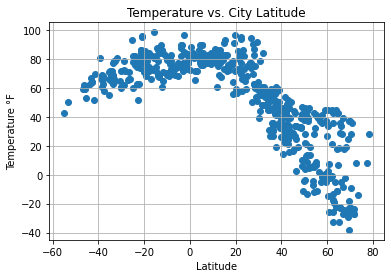

In [10]:
plt.scatter(lats, max_temps)
plt.title('Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature °F')
plt.grid(True)
plt.savefig('Output/lat_temp.png', bbox_inches='tight')

In this scatter plot we can see that as the latitude moves away from zero, the temperature begins to drop also.

#### Humidity (%) vs. Latitude

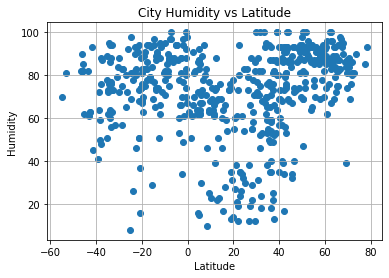

In [11]:
plt.scatter(lats, humidity)
plt.title('City Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig('Output/hum_lat.png',bbox_inches='tight')

We see no real relationship between latitude and humidity

#### Cloudiness (%) vs. Latitude

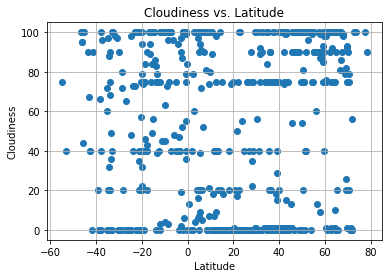

In [12]:
plt.scatter(lats, cloudiness)
plt.title('Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.savefig('Output/cloud_lat.png',bbox_inches='tight')

As with humidity and latitude, we see no real relationship between cloudiness and latitude either

#### Wind Speed (mph) vs. Latitude

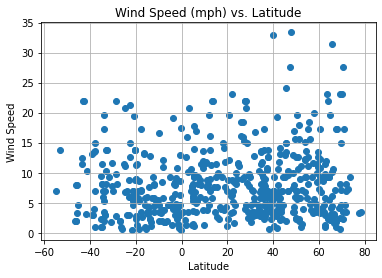

In [13]:
plt.scatter(lats, wind_speed)
plt.title('Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.savefig('Output/wind_lats.png',bbox_inches='tight')

The data shows wind speed did not change depending on latitude

# Linear Regression

In [14]:
def linear_regression(x_values, y_values, title, text_coordinates):    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"R-value is: {rvalue**2}")
    plt.show()

In [15]:
north_hemi_df = city_df.loc[(city_df["Lat"] >= 0)]
south_hemi_df = city_df.loc[(city_df["Lat"] < 0)]

#### Max Temp vs. Latitude Linear Regression

R-value is: 0.7381525670643347


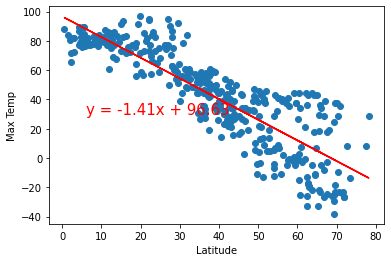

In [16]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
linear_regression(x_values, y_values, 'Max Temp',(6,30))

`There is a strong negative correlation. The graph indicates, as latitude increases, temperature decreases`

R-value is: 0.3261750275964859


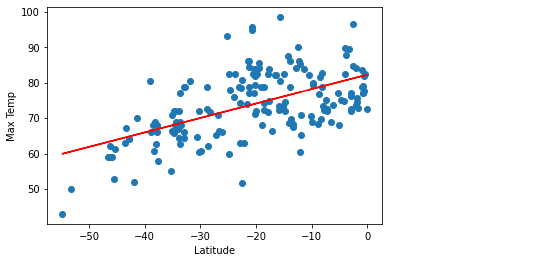

In [17]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
linear_regression(x_values, y_values, 'Max Temp',(6,30))

`There is a positive corellation: as you get closes to the equator the temperature increases`

#### Humidity (%) vs. Latitude Linear Regression

R-value is: 0.19005164856088141


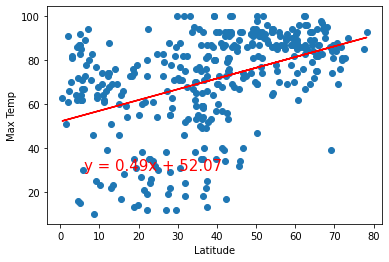

In [18]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
linear_regression(x_values, y_values, 'Max Temp',(6,30))

`There is no strong correlation between humidity and latitude`

R-value is: 0.03145090181940076


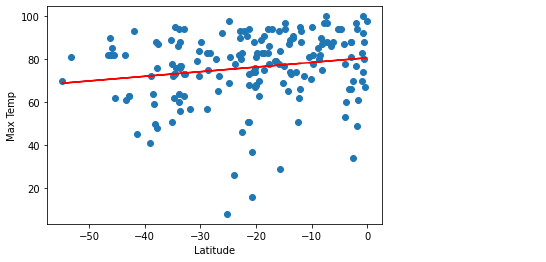

In [19]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
linear_regression(x_values, y_values, 'Max Temp',(6,30))

`There is no strong correlation between humidity and latitude`

#### Cloudiness (%) vs. Latitude Linear Regression

R-value is: 0.07882509699949436


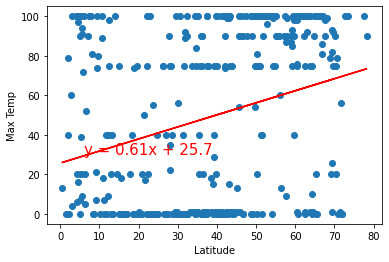

In [20]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 'Max Temp',(6,30))

R-value is: 0.011452679182487054


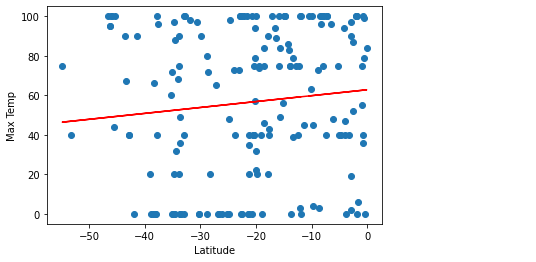

In [21]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 'Max Temp',(6,30))

`There is no strong correlation between cloudiness and latitude`

####  Wind Speed (mph) vs. Latitude Linear Regression

R-value is: 0.00014516112793826422


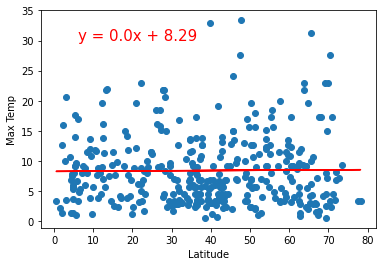

In [24]:
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, 'Max Temp',(6,30))

R-value is: 0.03248370084078503


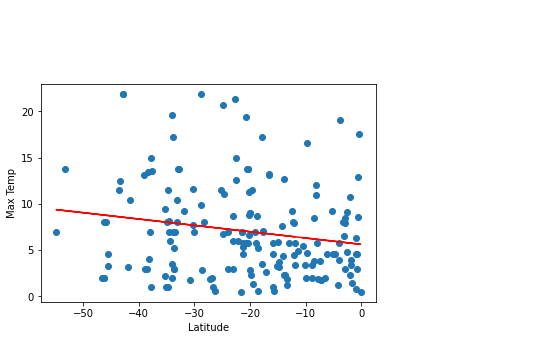

In [25]:
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, 'Max Temp',(6,30))

`There is no strong correlation between wind speed and latitude`